# Code snippets for Chapter 7 of R Data analysis cookbook-2nd Edition

## <mark> Creating ScatterPlots &larr;</mark>


In [1]:
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

Loading required package: ggplot2


In [2]:
auto <- read.csv("~/project-ionic/R/RDataAnalysisCookbookSecondEdition_Code/Chapter07/data/auto-mpg.csv", stringsAsFactors=FALSE)
head(auto)

No,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
1,28,4,140,90,2264,15.5,71,chevrolet vega 2300
2,19,3,70,97,2330,13.5,72,mazda rx2 coupe
3,36,4,107,75,2205,14.5,82,honda accord
4,28,4,97,92,2288,17.0,72,datsun 510 (sw)
5,21,6,199,90,2648,15.0,70,amc gremlin
6,23,4,115,95,2694,15.0,75,audi 100ls


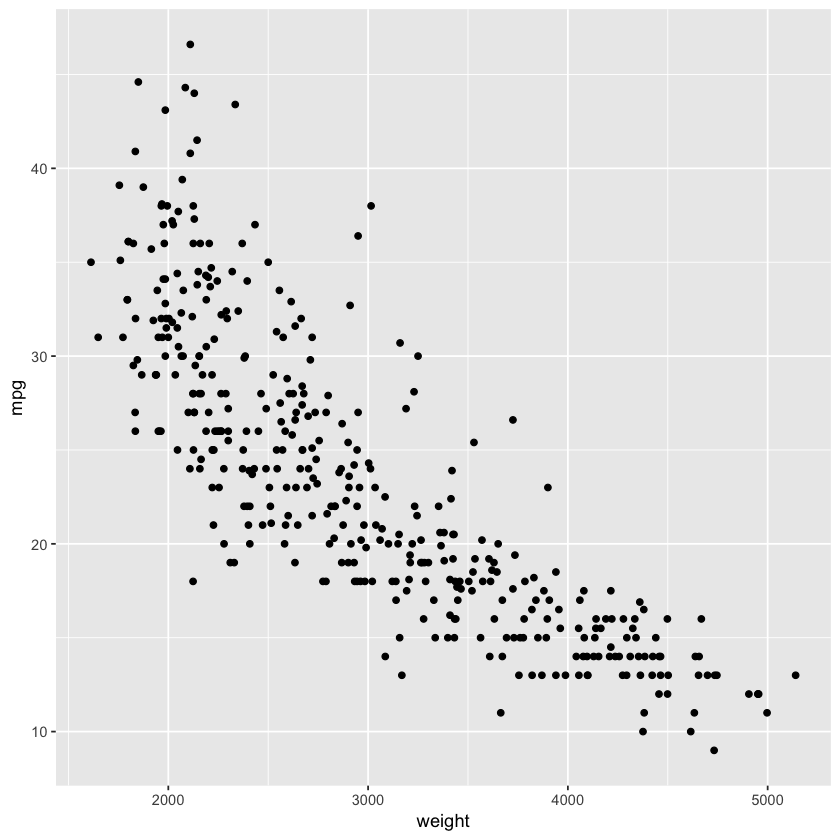

In [3]:
plot <- ggplot(auto, aes(weight, mpg))
plot + geom_point()

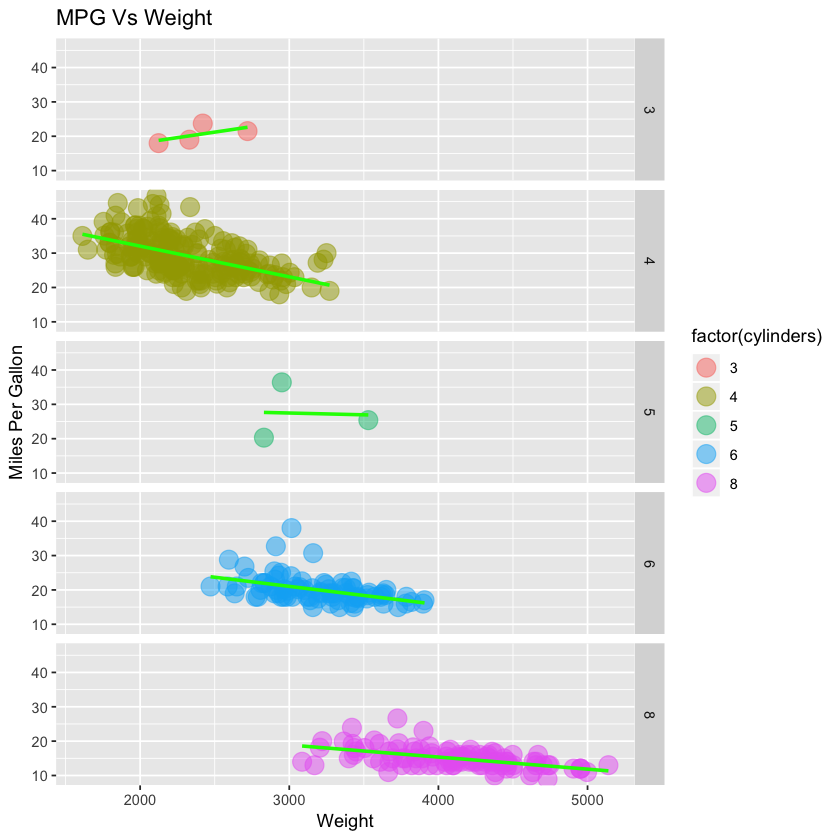

In [4]:
plot + geom_point(alpha=1/2, size=5, aes(color=factor(cylinders))) +
  geom_smooth(method="lm", se=FALSE, col="green") +
  facet_grid(cylinders~.) + 
  labs(x = "Weight") +
  labs(y = "Miles Per Gallon") + 
  labs(title = "MPG Vs Weight")

Warning message:
“Ignoring unknown parameters: method, formula”

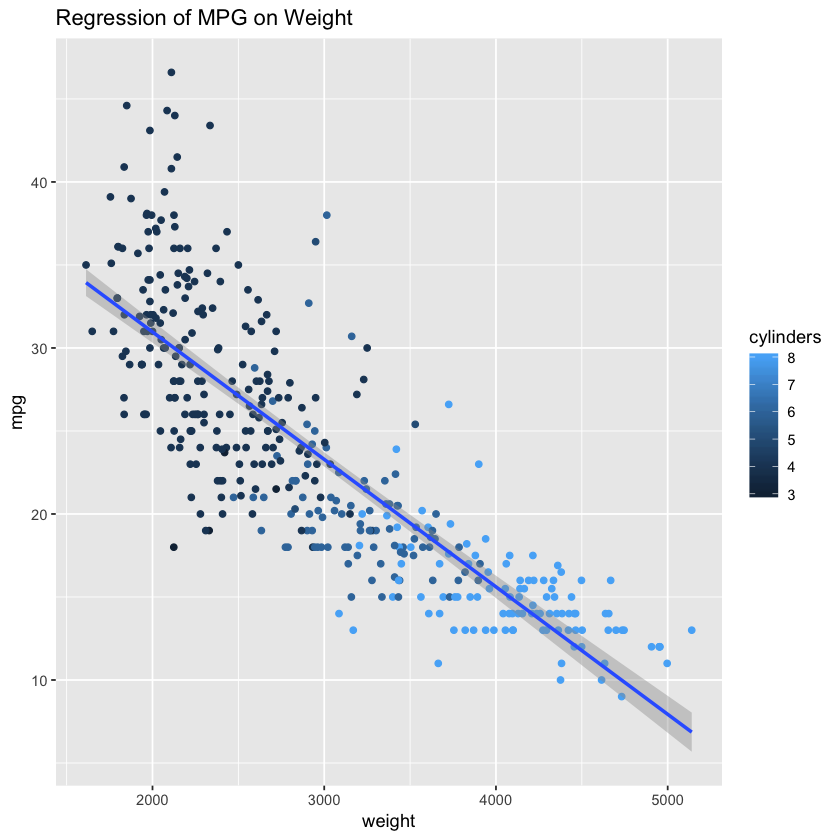

In [5]:
qplot(weight, mpg, data=auto, 
      geom=c("point", "smooth"), method="lm", formula=y~x, 
      color=cylinders, main="Regression of MPG on Weight")

## <mark> Creating Lines graphs &larr;</mark>

In [6]:
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

In [7]:
mtcars <- read.csv("~/project-ionic/R/RDataAnalysisCookbookSecondEdition_Code/Chapter07/data/mtcars.csv", stringsAsFactors=FALSE)
head(mtcars)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


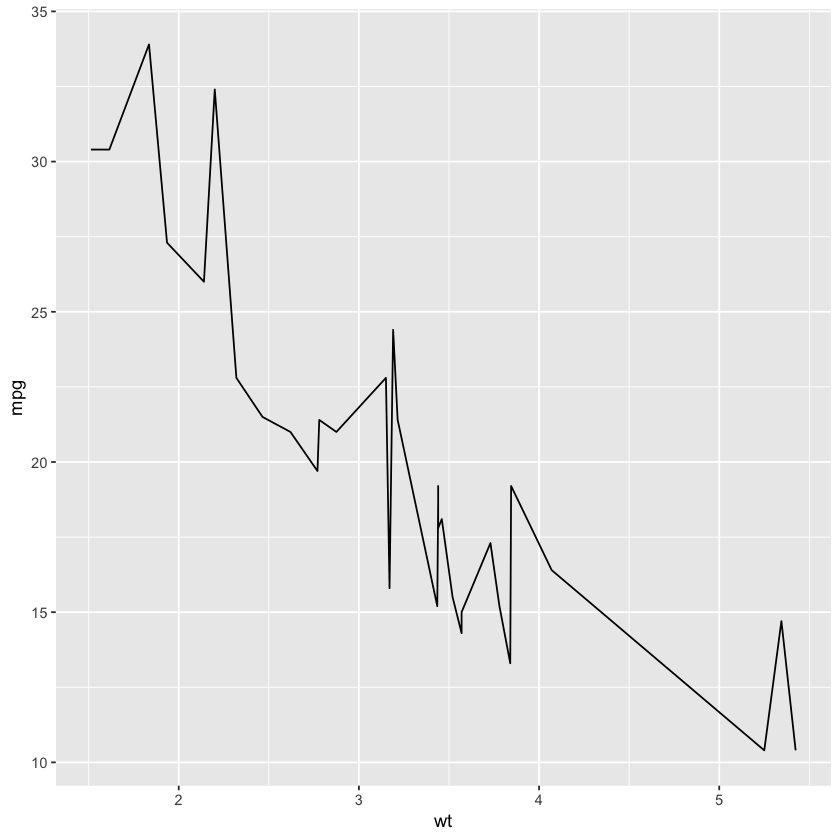

In [8]:
plot <- ggplot(mtcars, aes(wt, mpg))
plot + geom_line()

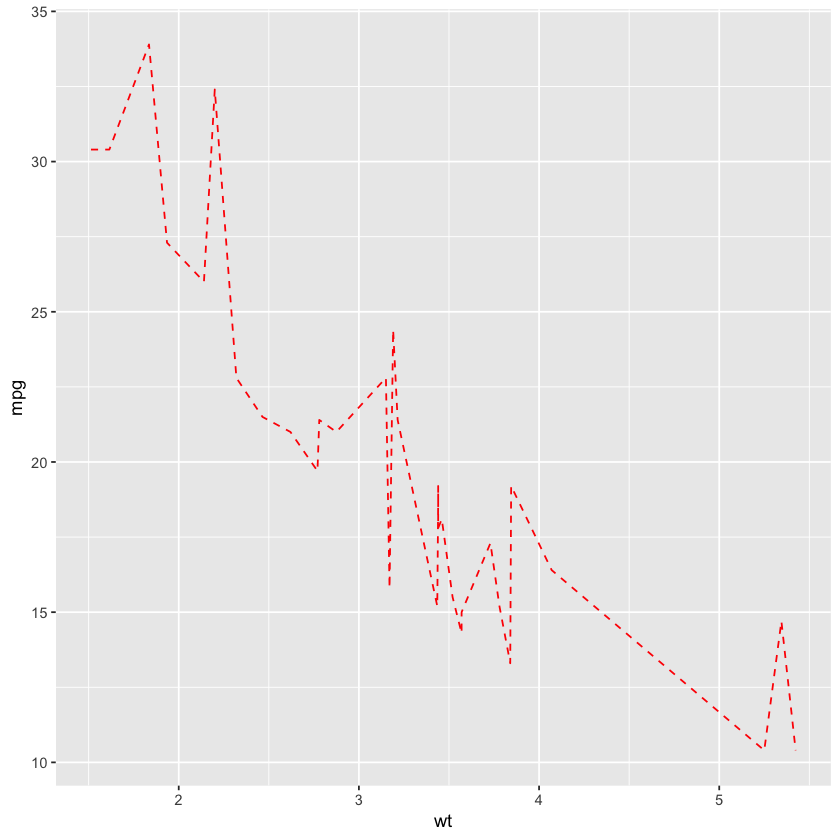

In [9]:
plot + geom_line(linetype = "dashed",color="red")

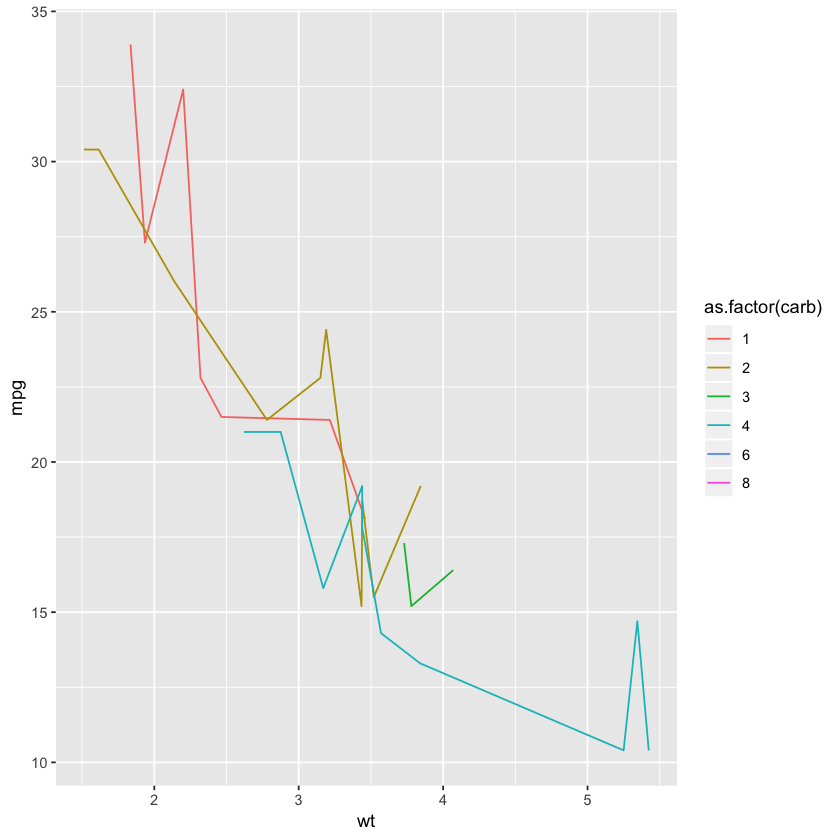

In [10]:
plot + geom_line(aes(color=as.factor(carb)))

## <mark> Creating Bar graphs &larr;</mark> 

In [11]:
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

In [12]:
if (!require("dplyr")) install.packages("dplyr")
library(dplyr)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [13]:
bike <- read.csv("~/project-ionic/R/RDataAnalysisCookbookSecondEdition_Code/Chapter07/data/daily-bike-rentals.csv")
head(bike)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [14]:
bike$season <- factor(bike$season, levels = c(1,2,3,4),labels = c("Spring", "Summer", "Fall", "Winter"))
bike$workingday <- factor(bike$workingday, levels = c(0,1),labels = c("Work day", "Free day"))
bike$weathersit <- factor(bike$weathersit, levels = c(1,2,3),labels = c("Clear", "Misty/cloudy", "Light snow"))
attach(bike)

In [25]:
bike.sum =bike %>% 
  group_by(season, workingday) %>% 
  summarize(rental = sum(cnt))

head(bike.sum)

season,workingday,rental
Spring,Work day,137683
Spring,Free day,333665
Summer,Work day,287976
Summer,Free day,630613
Fall,Work day,312056
Fall,Free day,749073


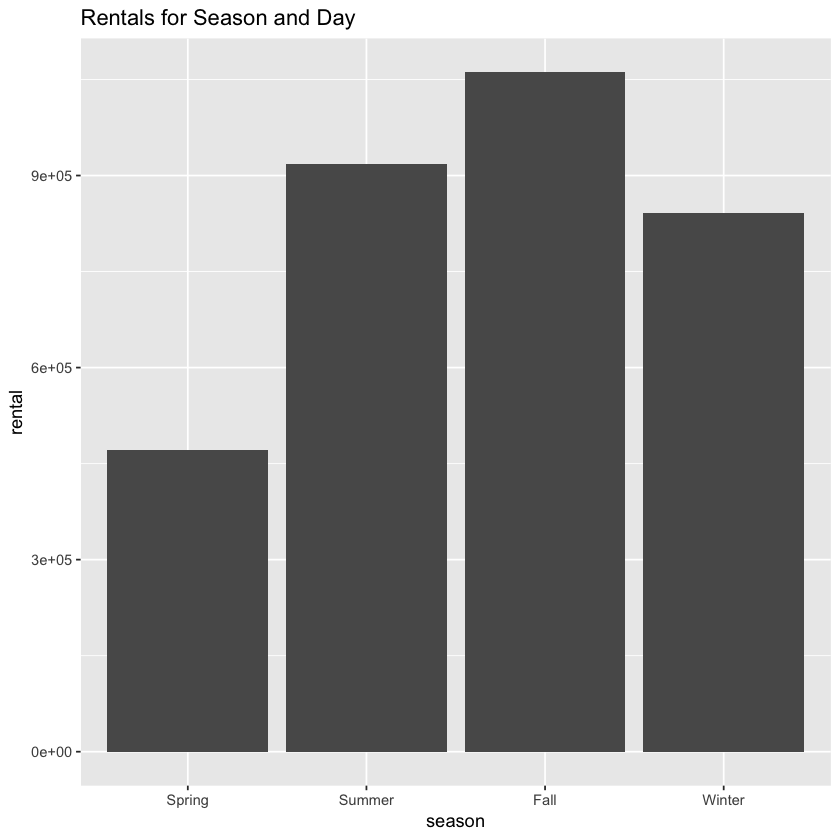

In [16]:
ggplot(bike.sum, aes(x= season, y= rental)) + 
    geom_bar(show.legend = TRUE, stat = "identity") + 
    labs(title = "Rentals for Season and Day")

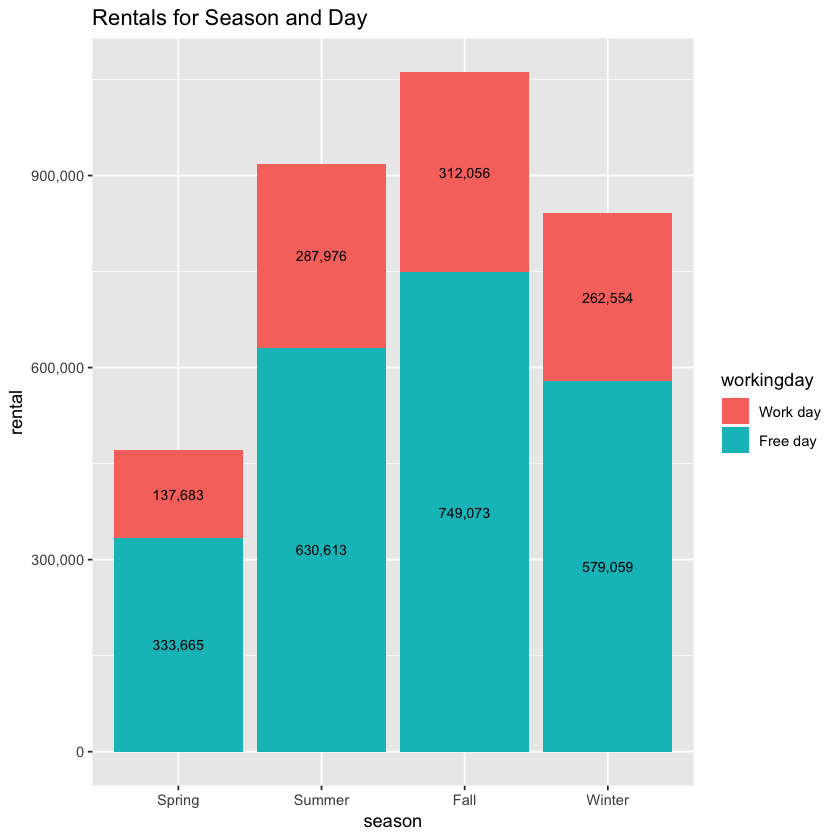

In [17]:
ggplot(bike.sum, aes(x= season, y= rental, fill = workingday,label = scales::comma(rental))) + 
  geom_bar(show.legend = TRUE, stat = "identity") + 
  labs(title = "Rentals for Season and Day") + 
  scale_y_continuous(labels = scales::comma) + 
  geom_text(size = 3, position = position_stack(vjust = 0.5))

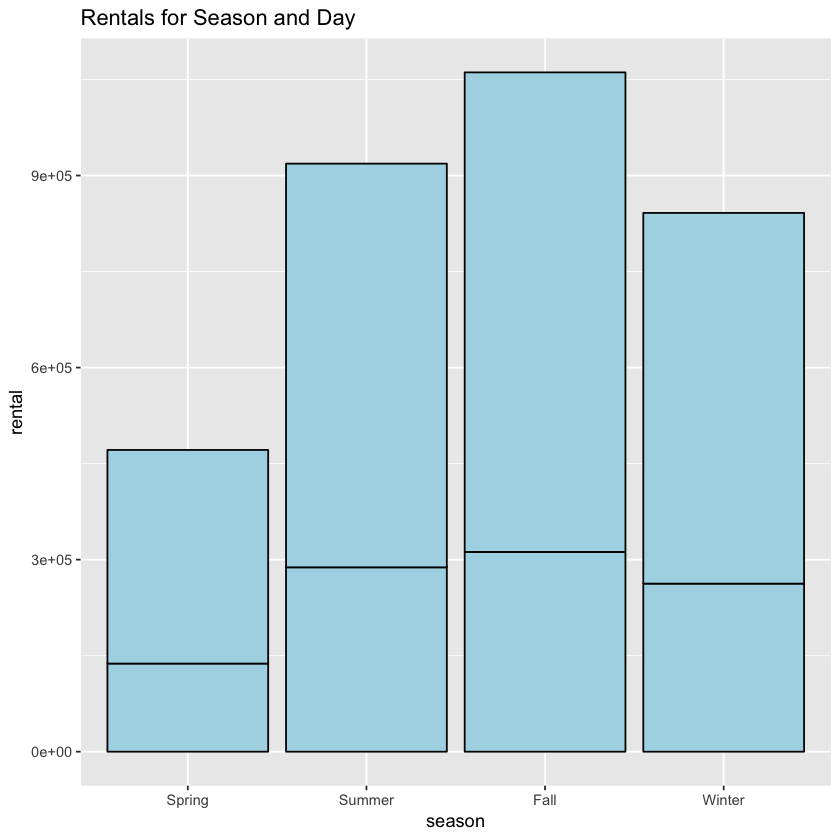

In [18]:
ggplot(bike.sum, aes(x= season, y= rental)) + 
    geom_bar(show.legend = TRUE, stat = "identity", fill="lightblue", colour="black") + 
    labs(title = "Rentals for Season and Day")

## <mark> Making Distributions plots &larr;</mark>

In [19]:
faithful=read.csv("~/project-ionic/R/RDataAnalysisCookbookSecondEdition_Code/Chapter07/data/faithful.csv")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


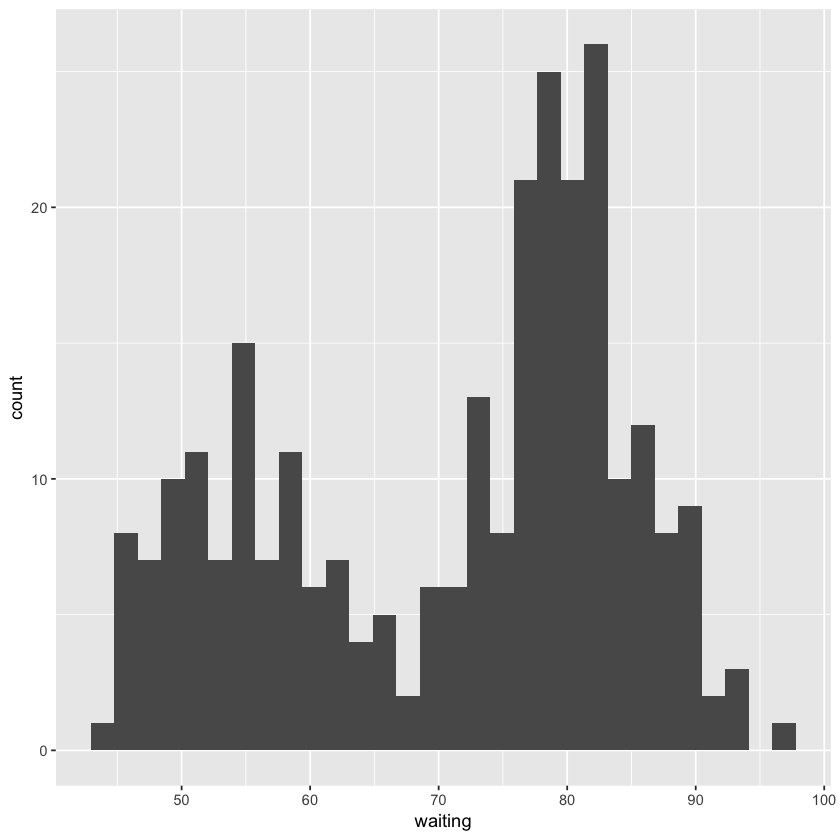

In [20]:
ggplot(faithful, aes(x=waiting)) + geom_histogram()

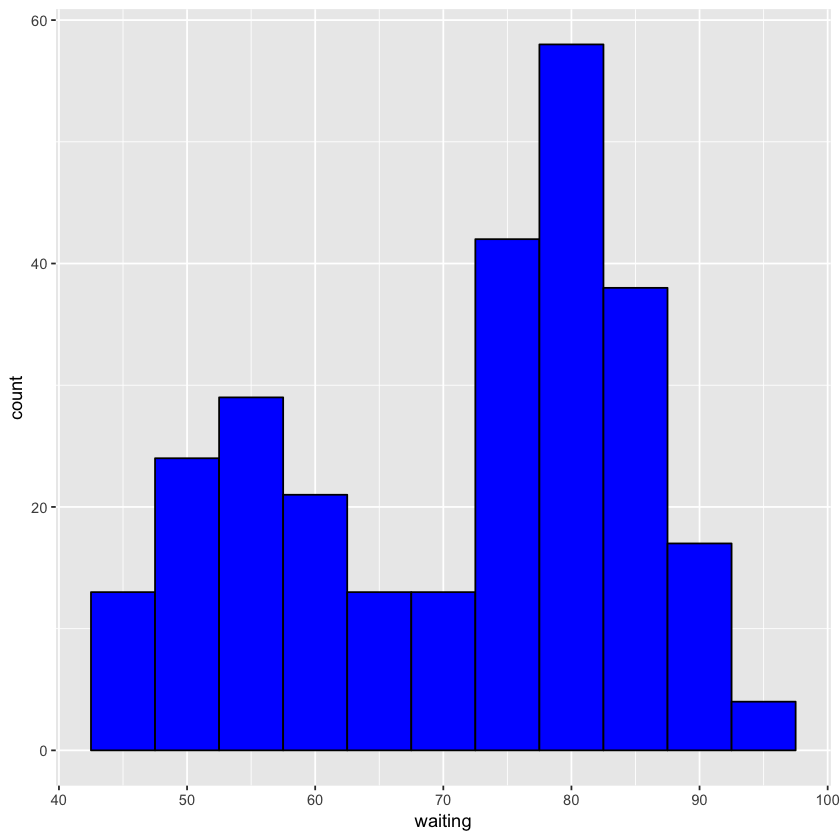

In [21]:
ggplot(faithful, aes(x=waiting)) +
  geom_histogram(binwidth=5, fill="blue", colour="black")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


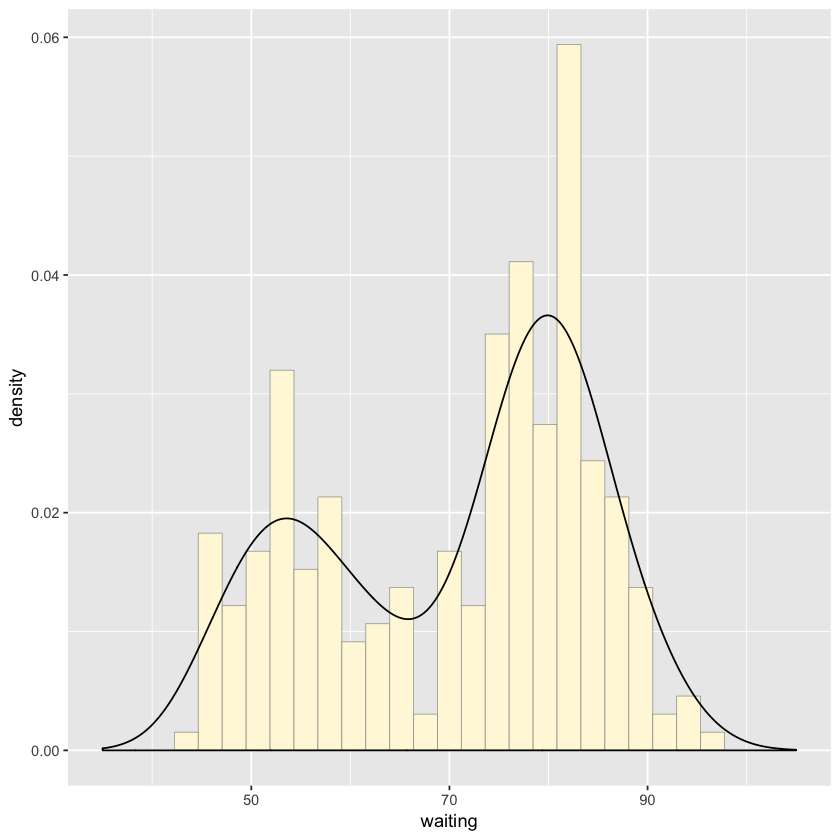

In [22]:
ggplot(faithful, aes(x=waiting, y=..density..)) +
  geom_histogram(fill="cornsilk", colour="grey60", size=.2) +
  geom_density() +
  xlim(35, 105)

## <mark> Creating Mosaic graphs &larr;</mark>

In [23]:
if (!require("stats")) install.packages("stats")
library(stats)

In [24]:
mtcars=read.csv("mtcars.csv")
head(mtcars)

Warning message in file(file, "rt"):
“cannot open file 'mtcars.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
mosaicplot(~ gear + carb, data = mtcars, color = 2:5, las = 1)

## <mark> Making Treemaps &larr;</mark>

In [ ]:
install.packages("treemap")
library(treemap)

In [ ]:
branch=c(rep("branch-1",4),rep("branch-2",2),rep("brach-3",3))
subbranch=paste("subbranch" , c(1,2,3,4,1,2,1,2,3), sep="-")
value=c(13,5,22,12,11,7,3,1,23)
data=data.frame(branch,subbranch,value)
data

In [ ]:
treemap(data,
        index=c("branch","subbranch"),
        vSize="value",
        type="index"
) 

In [ ]:
post_data=read.csv("~/project-ionic/R/RDataAnalysisCookbookSecondEdition_Code/Chapter07/data/post-data.csv")
post_data

In [ ]:
treemap(post_data,
        index=c("category", "comments"),
        vSize="views",
        type="index"
)

## <mark> Plotting Correlations matrix &larr;</mark>

In [ ]:
if (!require("corrplot")) install.packages("corrplot")
library(corrplot)

In [ ]:
mtcars=read.csv("~/project-ionic/R/RDataAnalysisCookbookSecondEdition_Code/Chapter07/data/mtcars.csv")
rownames(mtcars) <- mtcars$X
mtcars$X=NULL
head(mtcars)

In [ ]:
mtcars_cor <- cor(mtcars, method="pearson")
round(mtcars_cor, digits=2)

In [ ]:
corrplot(mtcars_cor)

In [ ]:
corrplot(mtcars_cor, method="shade", shade.col=NA, tl.col="black", tl.srt=45)

In [ ]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(mtcars_cor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         col=col(200), addCoef.col="black", addcolorlabel="no", order="AOE")

In [ ]:
if (!require("reshape2")) install.packages("reshape2")
library(reshape2)

In [ ]:
melted_cormat <- melt(mtcars_cor)
head(melted_cormat)

## Visualizing a correlation matrix with ggplot2 &larr;</mark>

In [ ]:
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + geom_tile()

## <mark> Creating Heatmaps &larr;</mark>

In [ ]:
get_lower_triangle<-function(cormat){
  cormat[upper.tri(cormat)] <- NA
  return(cormat)
}
get_upper_triangle <- function(cormat){
  cormat[lower.tri(cormat)]<- NA
  return(cormat)
}

reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd)
  cormat <-cormat[hc$order, hc$order]
}

cormat <- reorder_cormat(mtcars_cor)
upper_tri <- get_upper_triangle(cormat)
lower_tri <- get_lower_triangle(cormat)
melted_cormat <- melt(lower_tri, na.rm = TRUE) 



In [ ]:
ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1))+
  coord_fixed()

## Plotting a heatmap over geospatial data

This section is not included. It does not run on Jupyter notebooks unless you have a Google Developer API account. Feel free to explore this on your own.

## <mark> Plotting network graphs &larr;</mark>

In [ ]:
if (!require("igraph")) install.packages("igraph")
library(igraph)

In [ ]:
graph_directed <- graph(edges=c(1,2, 2,3, 2,4, 1,4, 5,5, 3,6, 5,6),n=6)
graph_directed

In [ ]:
graph_undirected <- graph(edges=c(1,2, 2,3, 2,4, 1,4, 5,5, 3,6, 5,6),n=6, directed=FALSE)
graph_undirected

In [ ]:
par(mfrow=c(1,2))
plot(graph_directed)
plot(graph_undirected)

In [ ]:
graph_isolation <- graph( 
    c( "Kuntal", "Maulim", "Maulim", "Yana","Yana","Kuntal", "Ranadeep", "Rabindrika","Ranadeep", "Kuntal"),              
    isolates=c("Suman", "Arunava", "Raja", "Manish","Gina") )  
graph_isolation

In [ ]:
plot(graph_isolation)

In [ ]:
plot(graph_isolation, edge.arrow.size=.5, vertex.color="gold", vertex.size=15, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=2, edge.curved=0.2) 

In [ ]:
set.seed(100)
plot(graph_directed)

## <mark> Labeling and legends &larr;</mark>

In [ ]:
library(ggplot2)

In [ ]:
toothgrowth=read.csv("ToothGrowth.csv")
head(toothgrowth)

In [ ]:
p <- ggplot(toothgrowth, aes(x=dose, y=len)) + geom_boxplot() 

p + ggtitle("Tooth groth Length vs Dose(mg/day) ") +
  xlab("Dose of Vitamin C(mg/day)") + 
  ylab("Tooth Length")

In [ ]:
p_leg <- ggplot(toothgrowth, aes(x=dose, y=len, fill=as.factor(dose))) + geom_boxplot() 
p_leg + labs(fill = "Dose (mg)")

p_leg + labs(fill = "Dose (mg)")+  theme(legend.position="top")

p_leg + guides(fill=FALSE)

## Coloring and themes 

In [ ]:
library(ggplot2)

In [ ]:
toothgrowth=read.csv("ToothGrowth.csv")
p <- ggplot(toothgrowth, aes(x=dose, y=len)) + geom_boxplot() 

In [ ]:
p + theme_bw() # balck and white

p + theme_dark()

p + theme_grey() # Grey back ground and white lines

p + theme(plot.background = element_rect(fill = "darkblue"))

p + theme(axis.text.x = element_text(face="bold", color="#993333", 
                                     size=14, angle=45),
          axis.text.y = element_text(face="bold", color="#993333", 
                                     size=14, angle=45))

p + theme(panel.border = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())

## Creating multivariate plots

In [ ]:
if (!require("GGally")) install.packages("GGally")
library(GGally)
library(ggplot2)


In [ ]:
bike <- read.csv("daily-bike-rentals.csv")
head(bike)

In [ ]:
bike$season <- factor(bike$season, levels = c(1,2,3,4), 
                        labels = c("Spring", "Summer", "Fall", "Winter"))
bike$weathersit <- factor(bike$weathersit, levels = c(1,2,3), 
                            labels = c("Clear", "Misty/cloudy", "Light snow"))
bike$windspeed.fac <- cut(bike$windspeed, breaks=3, 
                            labels=c("Low", "Medium", "High"))
bike$weekday <- factor(bike$weekday, levels = c(0:6), 
                         labels = c("Sun", "Mon", "Tue", "Wed", "Thur", "Fri", "Sat"))
attach(bike)
head(bike)

In [ ]:
plot <- ggplot(bike,aes(temp,cnt))
plot + geom_point(size=3, aes(color=factor(windspeed))) + 
  geom_smooth(method="lm", se=FALSE, col="red") + 
  facet_grid(weekday ~ season) + theme(legend.position="bottom")

## <mark> Multivariate plots with the GGally package &larr;</mark>

In [ ]:
auto <- read.csv("auto-mpg.csv", stringsAsFactors=FALSE)
head(auto)

In [ ]:
auto$cylinders <- factor(auto$cylinders,labels=c("3cyl","4cyl", "5cyl","6cyl","8cyl"))
ggpairs(auto[,2:5])

In [ ]:
ggpairs(auto[,2:5], aes(colour = cylinders, alpha = 0.4 ), title = "Multivariate Analysis") + 
    theme(plot.title = element_text(hjust = 0.5))

In [ ]:
ggpairs(auto[,2:5], aes(colour = cylinders, alpha = 0.4 ), 
        title = "Multivariate Analysis", upper = list(continuous = "density"), 
        lower = list(combo = "denstrip")) + theme(plot.title = element_text(hjust = 0.5))


## Creating 3D graphs[AV3]  

In [ ]:
if (!require("plot3D")) install.packages("plot3D")
library(plot3D)

In [ ]:
mtcars=read.csv("mtcars.csv")
rownames(mtcars) <- mtcars$X
mtcars$X=NULL
head(mtcars)

In [ ]:
scatter3D(x=mtcars$wt, y=mtcars$disp, z=mtcars$mpg, clab = c("Miles/(US) gallon"))

In [ ]:
scatter3D(x=mtcars$wt, y=mtcars$disp, z=mtcars$mpg, bty = "f",clab = c("Miles/(US) gallon"))

In [ ]:
scatter3D(x=mtcars$wt, y=mtcars$disp, z=mtcars$mpg, pch = 18,  theta = 20, phi = 20,
          main = "Motor Trend Car Road Tests", xlab = "Weight lbs",
          ylab ="Displacement (cu.in.)", zlab = "Miles gallon")

## 3D viewing direction

In [ ]:
scatter3D(x=mtcars$wt, y=mtcars$disp, z=mtcars$mpg,clab = c("Cars Mileage"),theta = 15, phi = 0, bty ="g")

In [ ]:
scatter3D(x=mtcars$wt, y=mtcars$disp, z=mtcars$mpg, phi = 0, bty = "g", pch = 20, cex = 0.5)
text3D(x=mtcars$wt, y=mtcars$disp, z=mtcars$mpg,  labels = rownames(mtcars),
       add = TRUE, colkey = FALSE, cex = 0.5)

In [ ]:
#Death Rates in Virginia
data(VADeaths)

In [ ]:
#  hist3D and ribbon3D with greyish background, rotated, rescaled,...
hist3D(z = VADeaths, scale = FALSE, expand = 0.01, bty = "g", phi = 20,
       col = "#0085C2", border = "black", shade = 0.2, ltheta = 80,
       space = 0.3, ticktype = "detailed", d = 2)

## Adding points and lines both 

In [ ]:
scatter3D(x=mtcars$wt, y=mtcars$disp, z=mtcars$mpg,type="h", clab = c("Miles/(US) gallon"))

## Selecting Graphic Device

In [ ]:
auto  <- read.csv("auto-mpg.csv",
   header = TRUE, stringsAsFactors = FALSE)
head(auto)

In [ ]:
auto$cylinders <- factor(auto$cylinders, levels = c(3,4,5,6,8),
  labels = c("3cyl", "4cyl", "5cyl", "6cyl", "8cyl"))

In [ ]:
attach(auto)

In [ ]:
postscript(file = "auto-boxplot.ps")
boxplot(mpg)
dev.off()

In [ ]:
pdf(file = "auto-boxplot.pdf")
boxplot(mpg)
dev.off()

In [ ]:
png(file="auto-boxplot.png",width=400,height=350,res=72)
boxplot(mpg)
dev.off()